In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import tensorflow as tf
import PIL.Image as pilimg
import os

import pandas as pd
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization

import random
import pickle
import cv2
import matplotlib

from glob import glob
from numpy import random
from PIL import Image

In [4]:
!cp '/gdrive/MyDrive/tmp/newdata/train_data.zip' ./
!cp '/gdrive/MyDrive/tmp/newdata/destroyed.zip' ./
!cp '/gdrive/MyDrive/tmp/newdata/sw_block.zip' ./
!cp '/gdrive/MyDrive/tmp/newdata/zoomout.zip' ./
!cp '/gdrive/MyDrive/tmp/newdata/zoomout_full.zip' ./
!cp '/gdrive/MyDrive/tmp/newdata/r_destroyed.zip' ./

In [5]:
!ls -al

total 281240
drwxr-xr-x 1 root root      4096 Aug 10 11:36 .
drwxr-xr-x 1 root root      4096 Aug 10 11:36 ..
drwxr-xr-x 4 root root      4096 Aug  3 20:20 .config
-rw------- 1 root root    936240 Aug 10 11:36 destroyed.zip
-rw------- 1 root root   1066566 Aug 10 11:36 r_destroyed.zip
drwxr-xr-x 1 root root      4096 Aug  3 20:21 sample_data
-rw------- 1 root root    386161 Aug 10 11:36 sw_block.zip
-rw------- 1 root root 131984646 Aug 10 11:36 train_data.zip
-rw------- 1 root root 153433287 Aug 10 11:36 zoomout_full.zip
-rw------- 1 root root    151023 Aug 10 11:36 zoomout.zip


In [6]:
!unzip train_data.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train_data/zoom_in4775.jpg  
  inflating: train_data/zoom_in4776.jpg  
  inflating: train_data/zoom_in4777.jpg  
  inflating: train_data/zoom_in4778.jpg  
  inflating: train_data/zoom_in4779.jpg  
  inflating: train_data/zoom_in4780.jpg  
  inflating: train_data/zoom_in4781.jpg  
  inflating: train_data/zoom_in4782.jpg  
  inflating: train_data/zoom_in4783.jpg  
  inflating: train_data/zoom_in4784.jpg  
  inflating: train_data/zoom_in4785.jpg  
  inflating: train_data/zoom_in4786.jpg  
  inflating: train_data/zoom_in4787.jpg  
  inflating: train_data/zoom_in4788.jpg  
  inflating: train_data/zoom_in4789.jpg  
  inflating: train_data/zoom_in4790.jpg  
  inflating: train_data/zoom_in4791.jpg  
  inflating: train_data/zoom_in4792.jpg  
  inflating: train_data/zoom_in4793.jpg  
  inflating: train_data/zoom_in4794.jpg  
  inflating: train_data/zoom_in4795.jpg  
  inflating: train_data/zoom_in4796.jpg  
  inflating: train_data/zoom_in4797.jpg 

In [7]:
!unzip destroyed.zip

Archive:  destroyed.zip
  inflating: destroyed/d1_1.jpg      
  inflating: destroyed/d1_10.jpg     
  inflating: destroyed/d1_11.jpg     
  inflating: destroyed/d1_12.jpg     
  inflating: destroyed/d1_13.jpg     
  inflating: destroyed/d1_14.jpg     
  inflating: destroyed/d1_15.jpg     
  inflating: destroyed/d1_16.jpg     
  inflating: destroyed/d1_17.jpg     
  inflating: destroyed/d1_18.jpg     
  inflating: destroyed/d1_19.jpg     
  inflating: destroyed/d1_2.jpg      
  inflating: destroyed/d1_20.jpg     
  inflating: destroyed/d1_21.jpg     
  inflating: destroyed/d1_22.jpg     
  inflating: destroyed/d1_23.jpg     
  inflating: destroyed/d1_24.jpg     
  inflating: destroyed/d1_25.jpg     
  inflating: destroyed/d1_26.jpg     
  inflating: destroyed/d1_27.jpg     
  inflating: destroyed/d1_28.jpg     
  inflating: destroyed/d1_29.jpg     
  inflating: destroyed/d1_3.jpg      
  inflating: destroyed/d1_30.jpg     
  inflating: destroyed/d1_31.jpg     
  inflating: destroyed/d1_

In [8]:
!unzip sw_block.zip

Archive:  sw_block.zip
  inflating: sw_block/w1.jpg         
  inflating: sw_block/w10.jpg        
  inflating: sw_block/w2.jpg         
  inflating: sw_block/w3.jpg         
  inflating: sw_block/w4.jpg         
  inflating: sw_block/w5.jpg         
  inflating: sw_block/w6.jpg         
  inflating: sw_block/w7.jpg         
  inflating: sw_block/w8.jpg         
  inflating: sw_block/w9.jpg         


In [9]:
!unzip zoomout.zip

Archive:  zoomout.zip
  inflating: zoomout/zoom_out1.jpg   
  inflating: zoomout/zoom_out10.jpg  
  inflating: zoomout/zoom_out2.jpg   
  inflating: zoomout/zoom_out3.jpg   
  inflating: zoomout/zoom_out4.jpg   
  inflating: zoomout/zoom_out5.jpg   
  inflating: zoomout/zoom_out6.jpg   
  inflating: zoomout/zoom_out7.jpg   
  inflating: zoomout/zoom_out8.jpg   
  inflating: zoomout/zoom_out9.jpg   


In [10]:
!unzip zoomout_full.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: zoomout_full/zoom_out2645.jpg  
  inflating: zoomout_full/zoom_out2646.jpg  
  inflating: zoomout_full/zoom_out2647.jpg  
  inflating: zoomout_full/zoom_out2648.jpg  
  inflating: zoomout_full/zoom_out2649.jpg  
  inflating: zoomout_full/zoom_out2650.jpg  
  inflating: zoomout_full/zoom_out2651.jpg  
  inflating: zoomout_full/zoom_out2652.jpg  
  inflating: zoomout_full/zoom_out2653.jpg  
  inflating: zoomout_full/zoom_out2654.jpg  
  inflating: zoomout_full/zoom_out2655.jpg  
  inflating: zoomout_full/zoom_out2656.jpg  
  inflating: zoomout_full/zoom_out2657.jpg  
  inflating: zoomout_full/zoom_out2658.jpg  
  inflating: zoomout_full/zoom_out2659.jpg  
  inflating: zoomout_full/zoom_out2660.jpg  
  inflating: zoomout_full/zoom_out2661.jpg  
  inflating: zoomout_full/zoom_out2662.jpg  
  inflating: zoomout_full/zoom_out2663.jpg  
  inflating: zoomout_full/zoom_out2664.jpg  
  inflating: zoomout_full/zoom_out2665.jpg  
  inflating: zoomou

In [11]:
!unzip r_destroyed.zip

Archive:  r_destroyed.zip
  inflating: r_destroyed/d_01.jpg    
  inflating: r_destroyed/d_02.jpg    
  inflating: r_destroyed/d_03.jpg    
  inflating: r_destroyed/d_04.jpg    
  inflating: r_destroyed/d_05.jpg    
  inflating: r_destroyed/d_06.jpg    
  inflating: r_destroyed/d_07.jpg    
  inflating: r_destroyed/d_08.jpg    
  inflating: r_destroyed/d_09.jpg    
  inflating: r_destroyed/d_10.jpg    
  inflating: r_destroyed/d_11.jpg    
  inflating: r_destroyed/d_12.jpg    
  inflating: r_destroyed/d_13.jpg    
  inflating: r_destroyed/d_14.jpg    
  inflating: r_destroyed/d_15.jpg    
  inflating: r_destroyed/d_16.jpg    
  inflating: r_destroyed/d_17.jpg    
  inflating: r_destroyed/d_18.jpg    
  inflating: r_destroyed/d_19.jpg    
  inflating: r_destroyed/d_20.jpg    
  inflating: r_destroyed/d_21.jpg    
  inflating: r_destroyed/d_22.jpg    
  inflating: r_destroyed/d_23.jpg    
  inflating: r_destroyed/d_24.jpg    
  inflating: r_destroyed/d_25.jpg    
  inflating: r_destroyed

# 0. 다른 코드로 불러오기

In [14]:
# Load Data
# data count
import os
zoomin_count = len(os.listdir('train_data'))
destroyed_count = len(os.listdir('destroyed'))
sw_block_count = len(os.listdir('sw_block'))
zoomout_count = len(os.listdir('zoomout'))
zoomout_count = len(os.listdir('r_destroyed'))

print(zoomin_count)
print(destroyed_count)
print(sw_block_count)
print(zoomout_count)

9774
31
10
29


In [13]:
# zoomin
zoomin_list = []
for i in range(zoomin_count): 
    str_i = str(i+1)
    if(i+1 <10000):
        str_i = str_i.zfill(4)
    else:
        str_i = str_i.zfill(5)  # 데이터 이름 형식에 따른 처리
    im = pilimg.open( 'train_data/zoom_in' + str_i + '.jpg')
    zoomin_list.append(np.array(im))

zoomin_data = np.array(zoomin_list)
zoomin_data.shape

(9774, 224, 224, 3)

In [ ]:
destroyed_list = []
for i in range(destroyed_count):
    str_i = str(i+1)
    im = pilimg.open( 'destroyed/d1_' + str_i + '.jpg')
    destroyed_list.append(np.array(im))

destroyed_data = np.array(destroyed_list)
destroyed_data.shape

(31, 224, 224, 3)

In [ ]:
sw_list = []
for i in range(sw_block_count):
    str_i = str(i+1)
    im = pilimg.open( 'sw_block/w' + str_i + '.jpg')
    sw_list.append(np.array(im))

sw_data = np.array(sw_list)
sw_data.shape

(10, 224, 224, 3)

In [ ]:
zoomout_list = []
for i in range(zoomout_count):
    str_i = str(i+1)
    im = pilimg.open( 'zoomout/zoom_out' + str_i + '.jpg')
    zoomout_list.append(np.array(im))

zoomout_data = np.array(zoomout_list)
zoomout_data.shape

(10, 224, 224, 3)

In [ ]:
# data normalize
zoomin_data = zoomin_data.astype('float32')/255
destroyed_data = zoomin_data.astype('float32')/255
sw_data = zoomin_data.astype('float32')/255
zoomout_data = zoomin_data.astype('float32')/255

In [ ]:
# 224, 224 사이즈였던 것을 128, 128로 crop
# zoomin data를 임시로 뽑아서 저장 후 이를 train, test로 나눔
a = 48
h = 128
crop_zoomin = []
for img in zoomin_data:
  crop_img = img[a : a + h, a : a + h]
  crop_zoomin.append(crop_img)

crop_zoomin = np.array(crop_zoomin)
crop_zoomin.shape

#0.1. 내 코드로 돌리기

In [12]:
zoomin_data = glob('train_data/*.jpg') # 전체 데이터셋 입력
destroyed_data = glob('destroyed/*jpg')
sw_block_data = glob('sw_block/*jpg')
zoomout_data = glob('zoomout/*jpg')
zoomoutfull_data = glob('zoomout_full/*jpg')
r_destroyed_data = glob('r_destroyed/*jpg')

In [13]:
print(len(zoomin_data))
print(len(destroyed_data))
print(len(sw_block_data))
print(len(zoomout_data))
print(len(zoomoutfull_data))
print(len(r_destroyed_data))

9774
31
10
10
10296
29


In [14]:
crop_zoomin = [] # 인풋에 들어가는 image 리스트 : Train data

for img in zoomin_data:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255
    y = 48
    h = 128
    x = 48
    w = 128
    crop_img = img[y: y + h, x: x + w]

    crop_zoomin.append(crop_img)

crop_zoomin = np.array(crop_zoomin)
crop_zoomin.shape

(9774, 128, 128, 3)

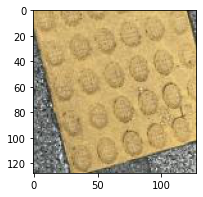

In [15]:
# check
plt.figure(figsize=(3, 3))
plt.imshow(crop_zoomin[1])
plt.show()

In [16]:
destroyed = []

for img in destroyed_data:
  img = load_img(img)
  img = img_to_array(img).astype('float32')/255
  y = 48
  h = 128
  x = 48
  w = 128
  crop_img = img[y: y + h, x: x + w]
  destroyed.append(crop_img)

destroyed = np.array(destroyed)

In [17]:
sw = []

for img in sw_block_data:
  img = load_img(img)
  img = img_to_array(img).astype('float32')/255
  y = 48
  h = 128
  x = 48
  w = 128
  crop_img = img[y: y + h, x: x + w]
  sw.append(crop_img)

sw = np.array(sw)

In [18]:
zoomout = []

for img in zoomout_data:
  img = load_img(img)
  img = img_to_array(img).astype('float32')/255
  y = 48
  h = 128
  x = 48
  w = 128
  crop_img = img[y: y + h, x: x + w]
  zoomout.append(crop_img)

zoomout = np.array(zoomout)

In [19]:
zoomoutfull = []

for img in zoomoutfull_data:
  img = load_img(img)
  img = img_to_array(img).astype('float32')/255
  y = 48
  h = 128
  x = 48
  w = 128
  crop_img = img[y: y + h, x: x + w]
  zoomoutfull.append(crop_img)

zoomoutfull = np.array(zoomoutfull)

In [20]:
random.seed(42)
idx = random.randint(low = zoomoutfull.shape[0], size = 1000)

In [21]:
zoomoutfull_random = np.array([])
for i in (idx):
  zoomoutfull_i = zoomoutfull[i]
  zoomoutfull_random = np.append(zoomoutfull_random, zoomoutfull_i)

zoomoutfull_r = np.reshape(zoomoutfull_random, (1000, 128, 128, 3))
print(zoomoutfull_r.shape)

(1000, 128, 128, 3)


In [22]:
r_destroyed = []

for img in r_destroyed_data:
  img = load_img(img)
  img = img_to_array(img).astype('float32')/255
  y = 48
  h = 128
  x = 48
  w = 128
  crop_img = img[y: y + h, x: x + w]
  r_destroyed.append(crop_img)

r_destroyed = np.array(r_destroyed)

In [23]:
# train and test split
train_x, test_n = train_test_split(crop_zoomin, test_size=0.1, shuffle=True, random_state=42)

In [24]:
print(train_x.shape)
print(test_n.shape)

(8796, 128, 128, 3)
(978, 128, 128, 3)


In [131]:
test_x = np.vstack([test_n, r_destroyed])
test_x.shape


(1007, 128, 128, 3)

#3. f1score, recall, precision 정의

In [26]:
from keras import backend as K
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [26]:
model = Sequential()

model.add(Input(shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))

model.add(Dense(2))

model.add(Conv2DTranspose(128, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(3, (1, 1), activation="sigmoid", padding="same"))




model.compile(optimizer='adam', loss='mse', metrics='accuracy')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

In [28]:
# auto encoder : use model.fit(train_data, train_data, ....)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)
hist = model.fit(train_x, train_x, epochs=400, batch_size=16, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/400
495/495 [==============================] - 33s 40ms/step - loss: 0.0110 - accuracy: 0.9438 - val_loss: 0.0079 - val_accuracy: 0.9400
Epoch 2/400
495/495 [==============================] - 19s 39ms/step - loss: 0.0063 - accuracy: 0.9273 - val_loss: 0.0055 - val_accuracy: 0.9153
Epoch 3/400
495/495 [==============================] - 19s 39ms/step - loss: 0.0051 - accuracy: 0.9111 - val_loss: 0.0058 - val_accuracy: 0.9316
Epoch 4/400
495/495 [==============================] - 19s 39ms/step - loss: 0.0050 - accuracy: 0.9136 - val_loss: 0.0051 - val_accuracy: 0.9079
Epoch 5/400
495/495 [==============================] - 19s 39ms/step - loss: 0.0050 - accuracy: 0.9168 - val_loss: 0.0054 - val_accuracy: 0.9162
Epoch 6/400
495/495 [==============================] - 19s 39ms/step - loss: 0.0048 - accuracy: 0.9223 - val_loss: 0.0049 - val_accuracy: 0.9408
Epoch 7/400
495/495 [==============================] - 19s 39ms/step - loss: 0.0047 - accuracy: 0.9243 - val_loss: 0.0049 - val_ac

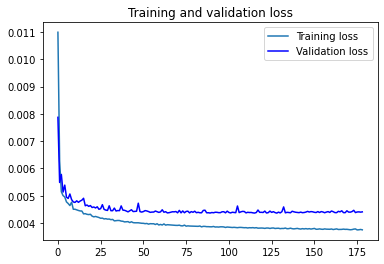

In [29]:
# plot loss history
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(loss))


plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [30]:
model.save("ae_bottleneck_16_179epoch.h5")

In [35]:
reconstructed = model.predict(train_x)

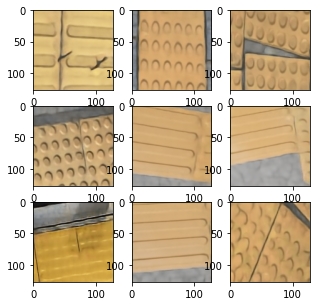

In [36]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(reconstructed[i].reshape((128,128,3)))

plt.show()

In [88]:
# train data를 (32,32,3)으로 resizing
resize_train_x = []
for img in train_x:
  resize_img = cv2.resize(img, (32,32))
  resize_train_x.append(resize_img)

resize_train_x = np.array(resize_train_x)
print(resize_train_x.shape)

(8796, 32, 32, 3)


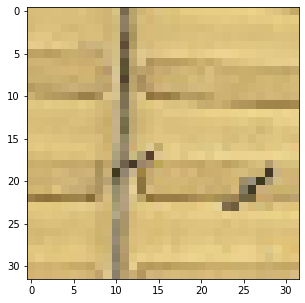

In [89]:
plt.figure(figsize=(5,5))
plt.imshow(resize_train_x[0])
plt.show()

In [90]:
# reconstructed를 (32,32,3)으로 resizing
resize_reconstructed = []
for img in reconstructed:
  resize_img = cv2.resize(img, (32,32))
  resize_reconstructed.append(resize_img)

resize_reconstructed = np.array(resize_reconstructed)
print(resize_reconstructed.shape)

(8796, 32, 32, 3)


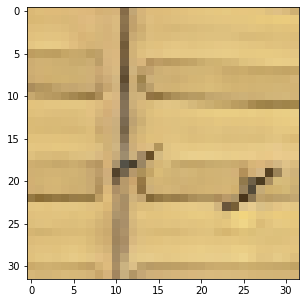

In [91]:
plt.figure(figsize=(5,5))
plt.imshow(resize_reconstructed[0])
plt.show()

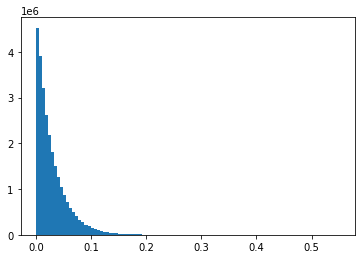

In [92]:
diff = np.abs(resize_reconstructed - resize_train_x)
plt.hist(diff.flatten(), bins=100)
plt.show()

#4-1. range threshold

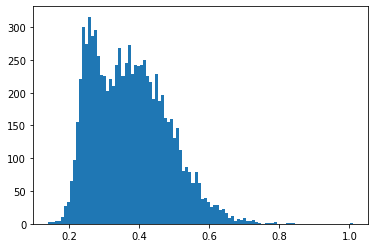

In [119]:
# residual range로 anormaly detection
errors = []

for (image, recon) in zip(resize_train_x, resize_reconstructed):
	# compute the mean squared error between the ground-truth image
	# and the reconstructed image, then add it to our list of errors
  tmp = image - recon
  rge = np.max(tmp) - np.min(tmp) #rge == range
  errors.append(rge)

plt.hist(errors, bins=100)
plt.show()

In [120]:
threshold_r = np.quantile(errors, 0.995)
print(threshold_r)

0.6854705885052678


In [132]:
reconstructed_test = model.predict(test_x)

In [133]:
# test_x를 (32,32,3)으로 resizing
resize_test_x = []
for img in test_x:
  resize_img = cv2.resize(img, (32,32))
  resize_test_x.append(resize_img)

resize_test_x = np.array(resize_test_x)
print(resize_test_x.shape)

(1007, 32, 32, 3)


In [134]:
# reconstructed를 (32,32,3)으로 resizing
resize_reconstructed_test = []
for img in reconstructed_test:
  resize_img = cv2.resize(img, (32,32))
  resize_reconstructed_test.append(resize_img)

resize_reconstructed_test = np.array(resize_reconstructed_test)
print(resize_reconstructed_test.shape)

(1007, 32, 32, 3)


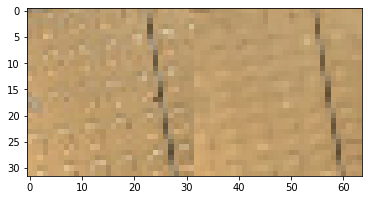

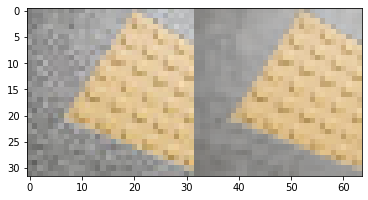

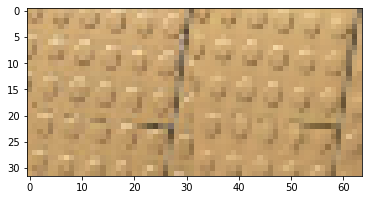

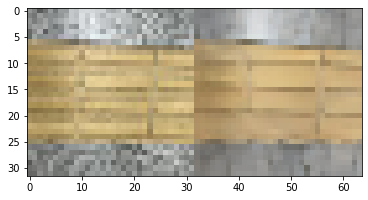

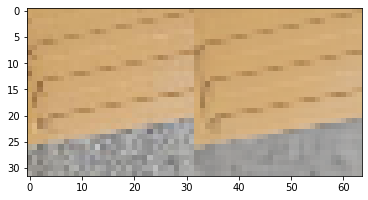

In [135]:
for i in range(5):
  combined = np.hstack([resize_test_x[i], resize_reconstructed_test[i]])
  plt.imshow(combined.squeeze())
  plt.show()

In [136]:
errors_test = []

for (image, recon) in zip(resize_test_x, resize_reconstructed_test):
	# compute the mean squared error between the ground-truth image
	# and the reconstructed image, then add it to our list of errors
	tmp = image - recon
	rge = np.max(tmp) - np.min(tmp) #rge == range
	errors_test.append(rge)

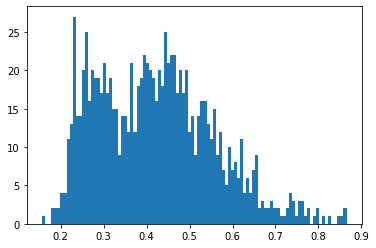

In [137]:
plt.hist(errors_test, bins=100)
plt.show()

In [138]:
anomaly_idxs_r = np.where(np.array(errors_test) >= threshold_r)[0]
print(len(anomaly_idxs_r))

37


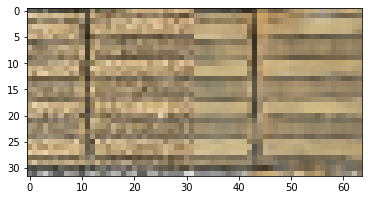

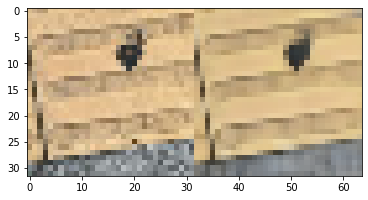

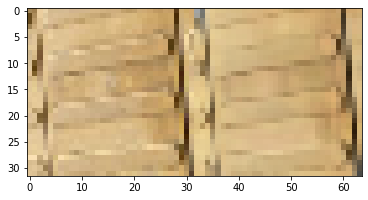

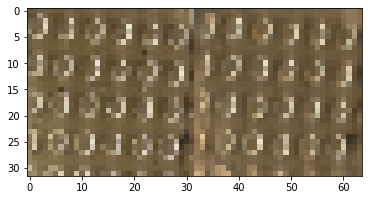

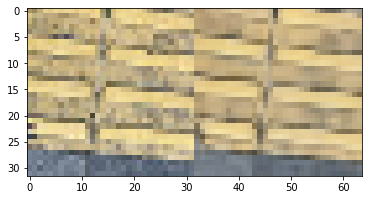

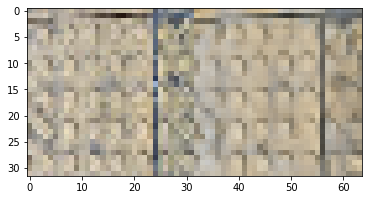

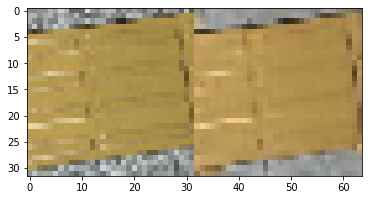

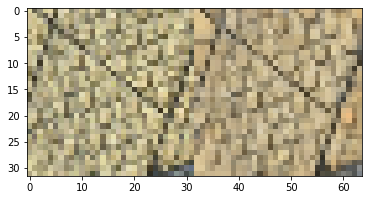

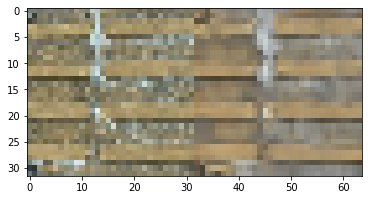

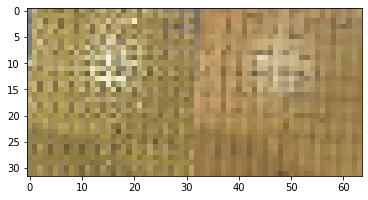

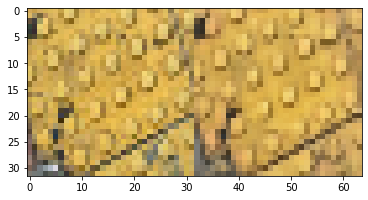

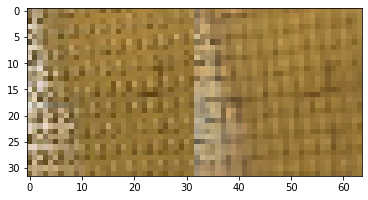

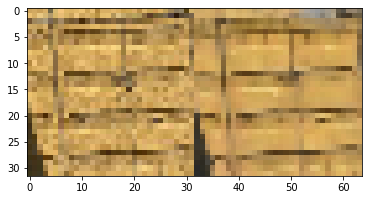

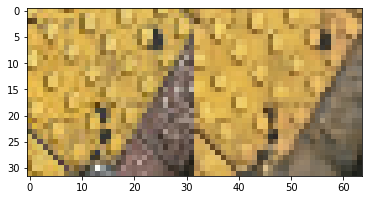

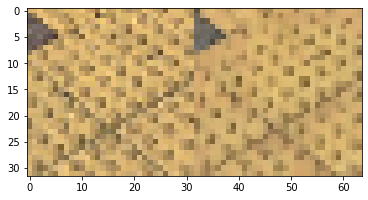

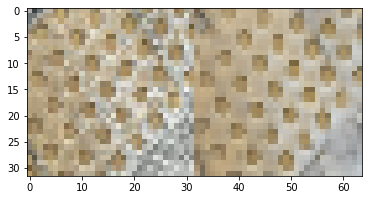

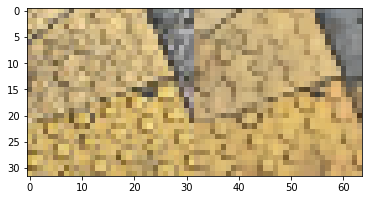

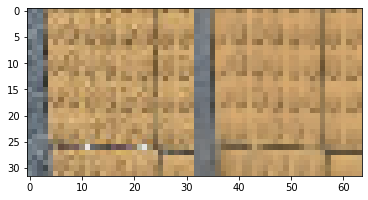

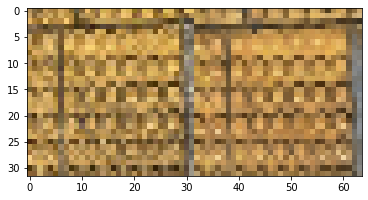

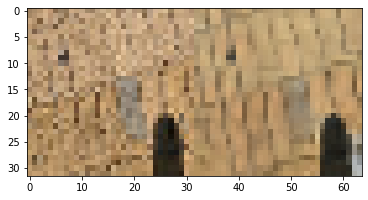

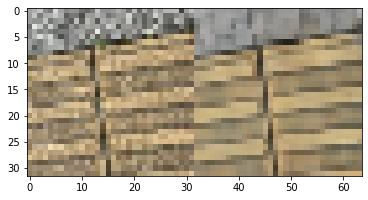

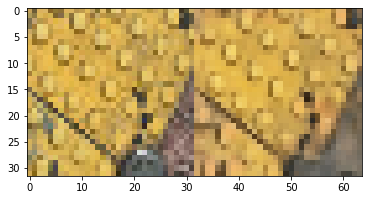

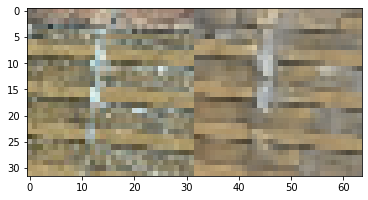

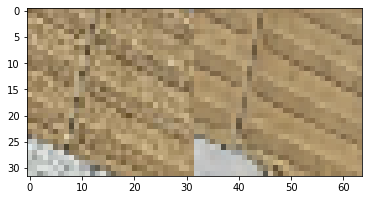

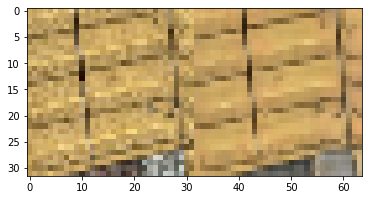

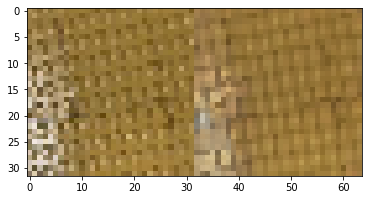

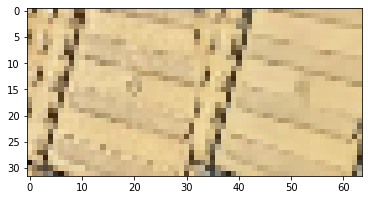

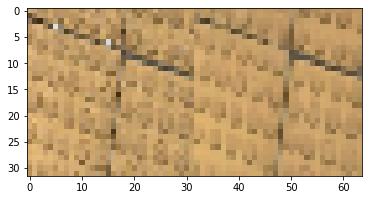

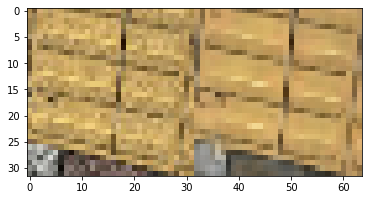

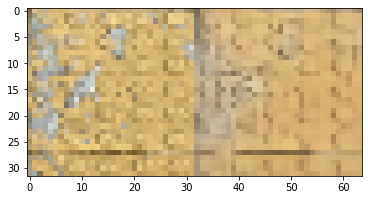

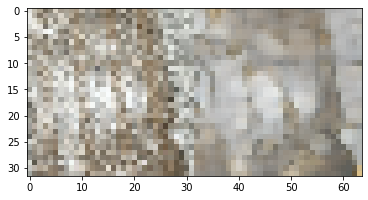

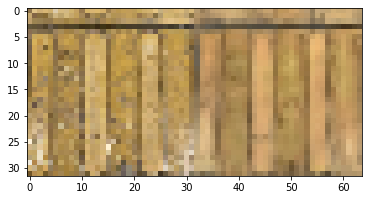

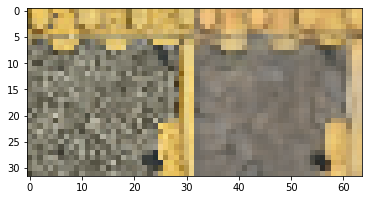

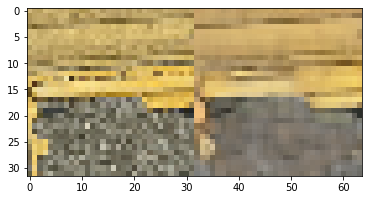

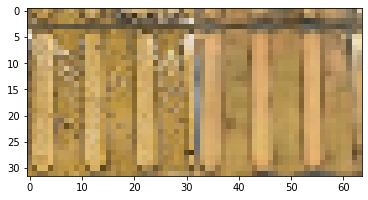

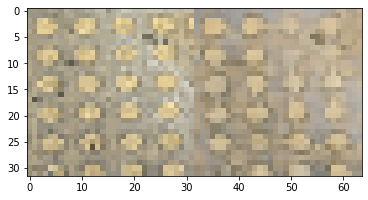

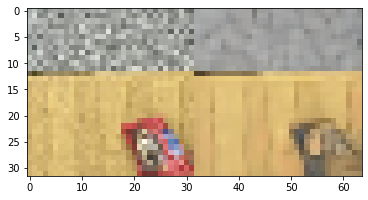

In [139]:
for i in anomaly_idxs_r:
  combined = np.hstack([resize_test_x[i], resize_reconstructed_test[i]])
  plt.imshow(combined.squeeze())
  plt.show()

## ㄴ 적중률 : normal: 29/978 => 0.97, r_destroyed : 8/29 => 0.276

In [ ]:
# r_destroyed에 대해서만 확인

In [101]:
reconstructed_r_destroyed = model.predict(r_destroyed)

In [102]:
# r_destroyed를 (32,32,3)으로 resizing
resize_r_destroyed = []
for img in r_destroyed:
  resize_img = cv2.resize(img, (32,32))
  resize_r_destroyed.append(resize_img)

resize_r_destroyed = np.array(resize_r_destroyed)
print(resize_r_destroyed.shape)

(29, 32, 32, 3)


In [103]:
# reconstructed_r_destroyed를 (32,32,3)으로 resizing
resize_reconstructed_r_destroyed = []
for img in reconstructed_r_destroyed:
  resize_img = cv2.resize(img, (32,32))
  resize_reconstructed_r_destroyed.append(resize_img)

resize_reconstructed_r_destroyed = np.array(resize_reconstructed_r_destroyed)
print(resize_reconstructed_r_destroyed.shape)

(29, 32, 32, 3)


In [104]:
errors_r_destroyed = []

for (image, recon) in zip(resize_r_destroyed, resize_reconstructed_r_destroyed):
	# compute the mean squared error between the ground-truth image
	# and the reconstructed image, then add it to our list of errors
	tmp = image - recon
	rge = np.max(tmp) - np.min(tmp) #rge == range
	errors_r_destroyed.append(rge)

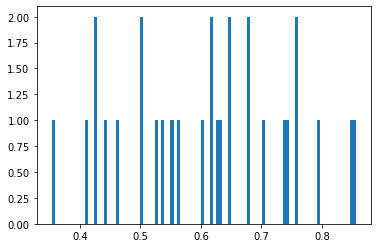

In [105]:
plt.hist(errors_r_destroyed, bins=100)
plt.show()

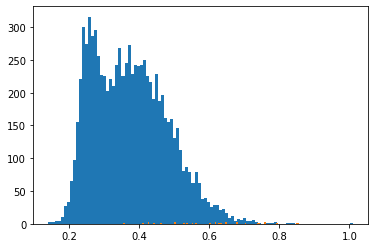

In [106]:
# 정상 zoomin 데이터 분포와 파손 데이터의 diff 분포 비교
plt.hist(errors, bins=100)
plt.hist(errors_r_destroyed, bins=100)
plt.show()

In [122]:
anomaly_idxs_r = np.where(np.array(errors_r_destroyed) >= threshold_r)[0]
print(len(anomaly_idxs_r))
print(anomaly_idxs_r)

8
[ 1  5  8 13 15 26 27 28]


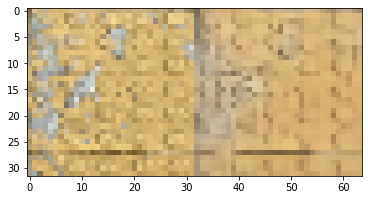

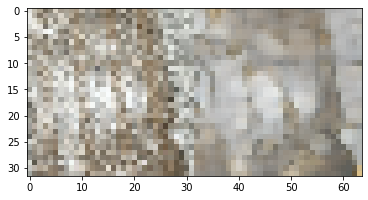

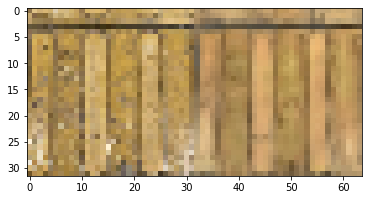

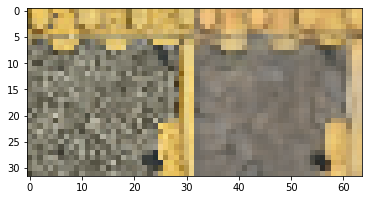

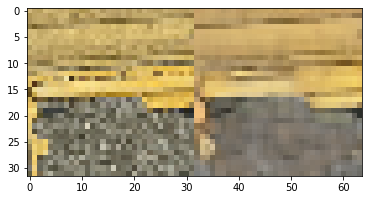

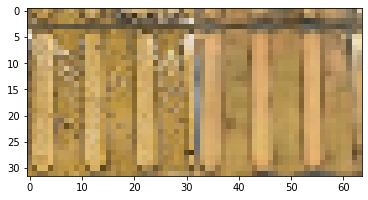

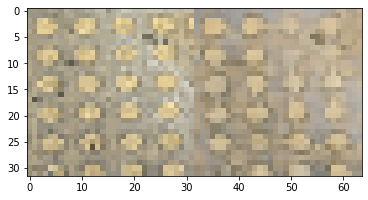

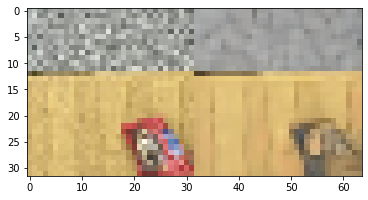

In [108]:
for i in anomaly_idxs_r:
  combined = np.hstack([resize_r_destroyed[i], resize_reconstructed_r_destroyed[i]])
  plt.imshow(combined.squeeze())
  plt.show()

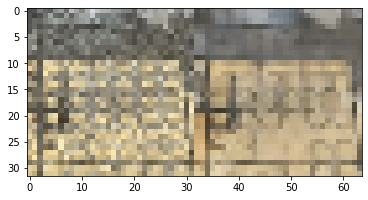

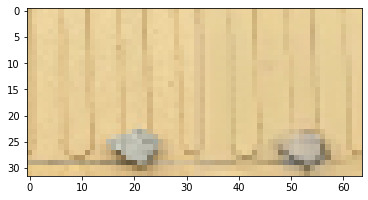

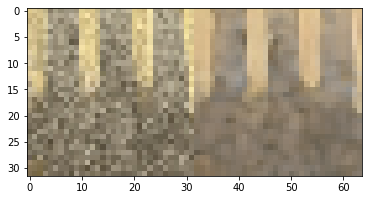

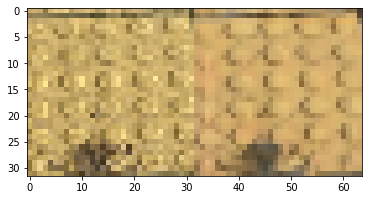

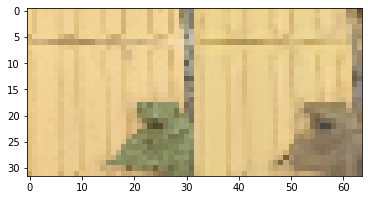

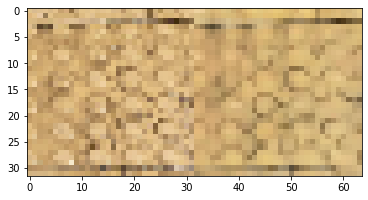

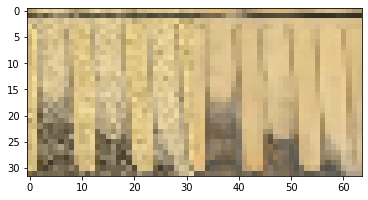

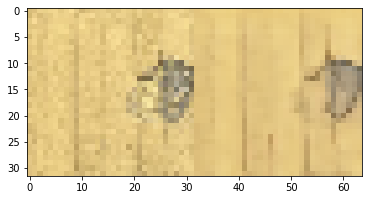

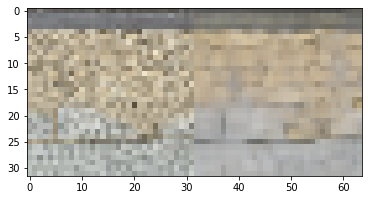

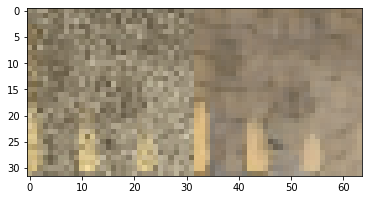

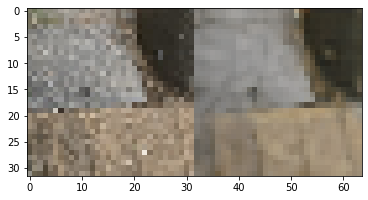

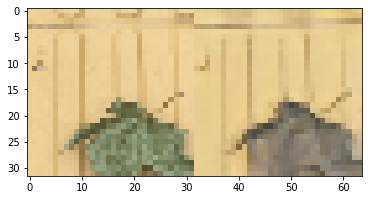

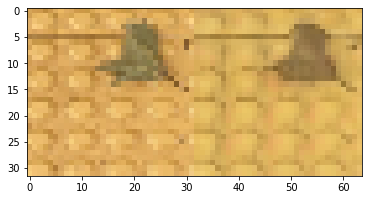

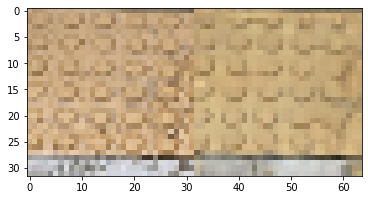

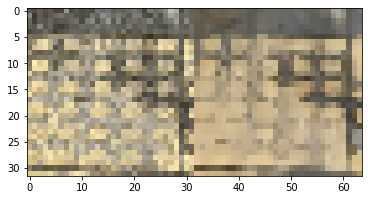

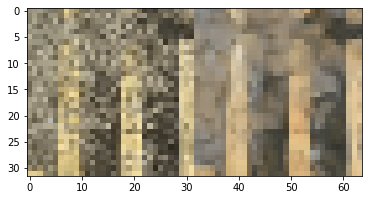

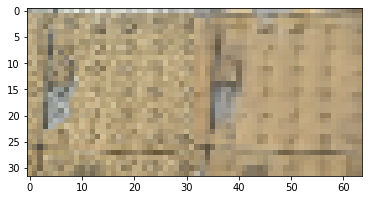

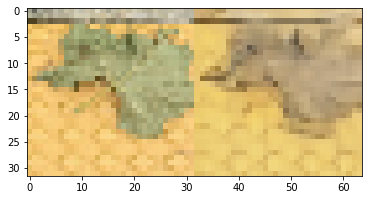

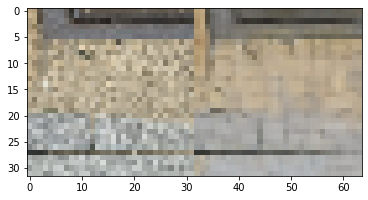

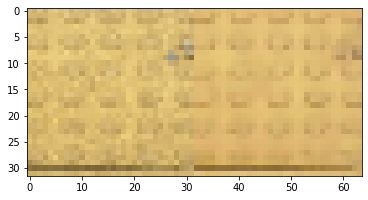

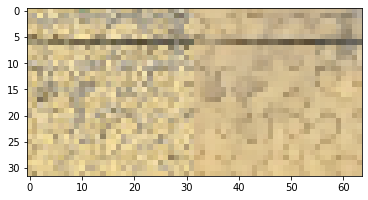

In [109]:
# 64 : [ 5  8 13 14 15 18 19 20 22 26 28]
# 32 : [ 1  5  8 13 15 26 27 28]
# 중복 : [5, 8, 13, 15, 26, 28]

other_idxs = [0, 2, 3, 4, 6, 7, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
for i in other_idxs:
  combined = np.hstack([resize_r_destroyed[i], resize_reconstructed_r_destroyed[i]])
  plt.imshow(combined.squeeze())
  plt.show()

#4-2. 2차원으로 바꿔서 range 해서 threshold 구하기

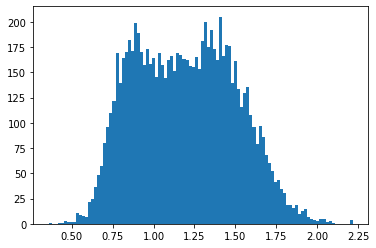

In [110]:
# residual range로 anormaly detection
errors_2d = []

for (image, recon) in zip(train_x, reconstructed):
	# compute the mean squared error between the ground-truth image
	# and the reconstructed image, then add it to our list of errors
  tmp = image - recon
  tmp = np.abs(tmp)
  tmp_2d = np.sum(tmp, axis = 2)
  max = np.max(tmp_2d)
  #rge = np.max(tmp_2d) - np.min(tmp_2d) #rge == range
  errors_2d.append(max)
  #errors_2d.append(rge)

plt.hist(errors_2d, bins=100)
plt.show()

In [ ]:
threshold_r = np.quantile(errors_2d, 0.995)
print(threshold_r)

2.1627489912510067


In [ ]:
errors_test_2d = []

for (image, recon) in zip(test_x, reconstructed_test):
	# compute the mean squared error between the ground-truth image
	# and the reconstructed image, then add it to our list of errors
  tmp = image - recon
  tmp = np.abs(tmp)
  tmp_2d = np.sum(tmp, axis = 2)
  max = np.max(tmp_2d)
  #rge = np.max(tmp_2d) - np.min(tmp_2d) #rge == range
  errors_test_2d.append(max)
  #errors_test_2d.append(rge)

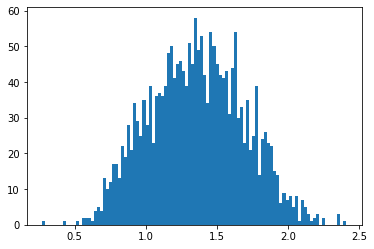

In [ ]:
plt.hist(errors_test_2d, bins=100)
plt.show()

In [ ]:
anomaly_idxs_r = np.where(np.array(errors_test_2d) >= threshold_r)[0]
print(len(anomaly_idxs_r))

12


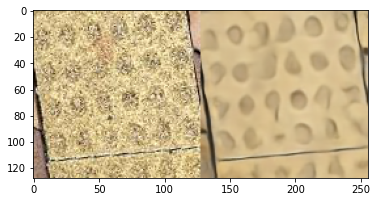

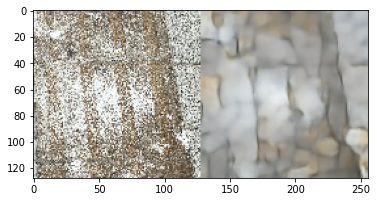

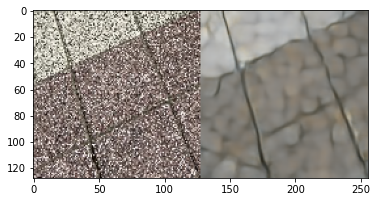

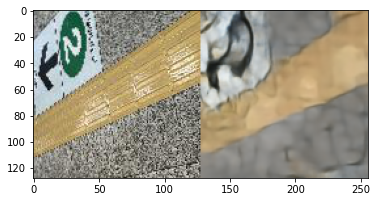

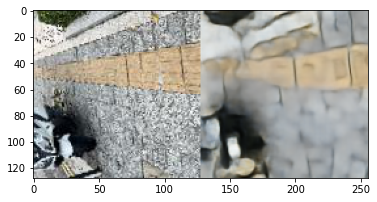

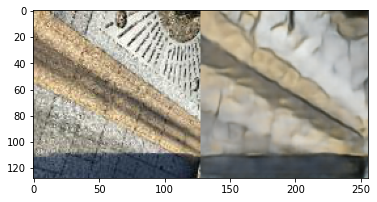

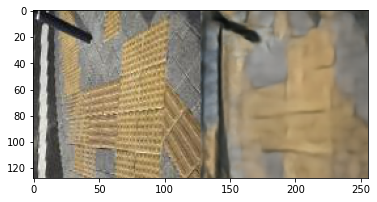

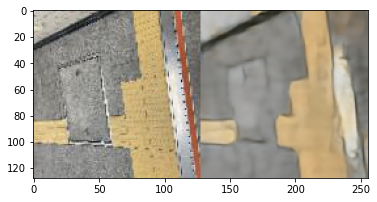

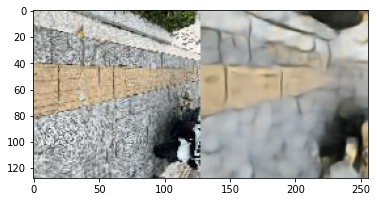

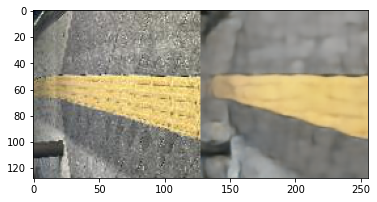

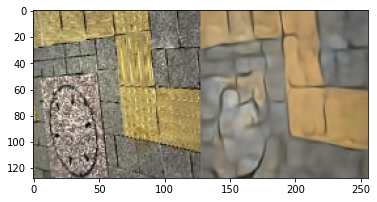

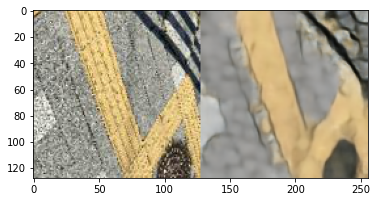

1
1
1
9


In [ ]:
normal_count = 0
destroyed_count = 0
sw_count = 0
zoomout_count = 0
for i in anomaly_idxs_r:
  combined = np.hstack([test_x[i], reconstructed_test[i]])
  plt.imshow(combined.squeeze())
  plt.show()
  if i <= 977:
    normal_count += 1
  elif (i > 977) & (i <= 1008):
    destroyed_count +=1
  elif (i > 1008) & (i <=1018):
    sw_count +=1
  else:
    zoomout_count +=1

print(normal_count)
print(destroyed_count)
print(sw_count)
print(zoomout_count)

# r_destroyed에 대해서 threshold_2 방법으로 구하기

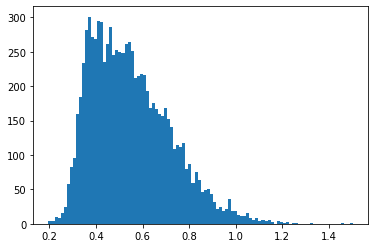

In [111]:
# residual range로 anormaly detection
errors_2d = []

for (image, recon) in zip(resize_train_x, resize_reconstructed):
	# compute the mean squared error between the ground-truth image
	# and the reconstructed image, then add it to our list of errors
  tmp = image - recon
  tmp = np.abs(tmp)
  tmp_2d = np.sum(tmp, axis = 2)
  max = np.max(tmp_2d)
  #rge = np.max(tmp_2d) - np.min(tmp_2d) #rge == range
  errors_2d.append(max)
  #errors_2d.append(rge)

plt.hist(errors_2d, bins=100)
plt.show()

In [112]:
threshold_r = np.quantile(errors_2d, 0.995)
print(threshold_r)

1.0804865896701803


In [113]:
errors_r_destroyed_2d = []

for (image, recon) in zip(resize_r_destroyed, resize_reconstructed_r_destroyed):
	# compute the mean squared error between the ground-truth image
	# and the reconstructed image, then add it to our list of errors
  tmp = image - recon
  tmp = np.abs(tmp)
  tmp_2d = np.sum(tmp, axis = 2)
  max = np.max(tmp_2d)
  #rge = np.max(tmp_2d) - np.min(tmp_2d) #rge == range
  errors_r_destroyed_2d.append(max)
  #errors_test_2d.append(rge)

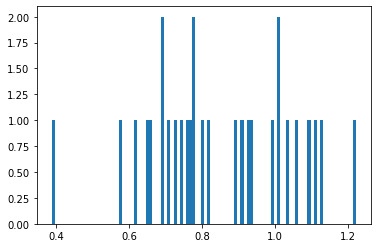

In [114]:
plt.hist(errors_r_destroyed_2d, bins=100)
plt.show()

In [115]:
anomaly_idxs_r = np.where(np.array(errors_r_destroyed_2d) >= threshold_r)[0]
print(len(anomaly_idxs_r))

4


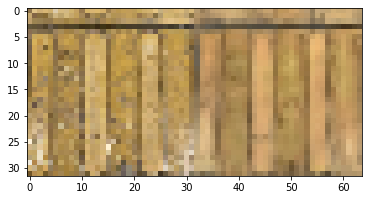

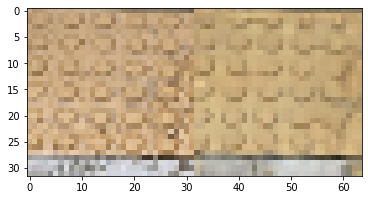

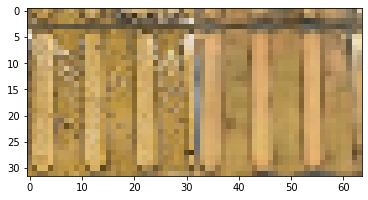

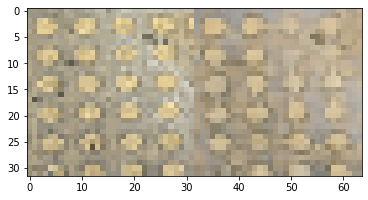

In [116]:
for i in anomaly_idxs_r:
  combined = np.hstack([resize_r_destroyed[i], resize_reconstructed_r_destroyed[i]])
  plt.imshow(combined.squeeze())
  plt.show()

이 방법은 resize에서는 성능이 좋지 못함.

# tflite로 변환

In [34]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

open("ae_convert_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp_25nvz2d/assets


INFO:tensorflow:Assets written to: /tmp/tmp_25nvz2d/assets


3091256